1.Data Loading:

The script starts by importing necessary libraries like Pandas, NumPy, Matplotlib, Seaborn, and scikit-learn modules.
Two datasets, world_cup and results, are loaded using Pandas from CSV files.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split

In [69]:
# Load the datasets with the specified encoding
world_cup = pd.read_csv('/content/drive/MyDrive/Project 2/World Cup 2023 DataSet N.csv', encoding='ISO-8859-1')
results = pd.read_csv('/content/drive/MyDrive/Project 2/Result N.csv', encoding='ISO-8859-1')

In [70]:
world_cup

,Teams,Group,Previous appearance,Previous titles,Previous finals,Previous Semi-finals,Current Rank
0,India,A,12,2,3,7,1
1,Pakistan,A,12,1,2,6,2
2,Australia,A,12,5,7,8,3
3,South Africa,A,8,0,0,4,4
4,England,A,12,1,4,6,5
5,New Zealand,A,12,0,2,8,6
6,Sri Lanka,A,12,1,4,4,7
7,Bangladesh,A,6,0,0,0,8
8,Afghanistan,A,2,0,0,0,9
9,Netherlands,A,4,0,0,0,10


In [71]:
results

,Match Date,Team..1,Team..2,Winner,Margin,Ground
0,08-Jan-21,U.A.E.,Ireland,U.A.E.,6 wickets,Abu Dhabi
1,18-Jan-21,U.A.E.,Ireland,Ireland,112 runs,Abu Dhabi
2,20-Jan-21,Bangladesh,West Indies,Bangladesh,6 wickets,Mirpur
3,21-Jan-21,Afghanistan,Ireland,Afghanistan,16 runs,Abu Dhabi
4,22-Jan-21,Bangladesh,West Indies,Bangladesh,7 wickets,Mirpur
...,...,...,...,...,...,...
385,23-Sep-23,England,Ireland,England,48 runs,Nottingham
386,24-Sep-23,India,Australia,India,99 runs,Indore
387,26-Sep-23,Bangladesh,New Zealand,New Zealand,7 wickets,Mirpur
388,26-Sep-23,England,Ireland,no result,-,Bristol


In [72]:
df = results[(results['Team..1'] == 'India') | (results['Team..2'] == 'India')]
india = df.iloc[:]
india

,Match Date,Team..1,Team..2,Winner,Margin,Ground
13,23-Mar-21,India,England,India,66 runs,Pune
15,26-Mar-21,India,England,England,6 wickets,Pune
16,28-Mar-21,India,England,India,7 runs,Pune
39,18-Jul-21,Sri Lanka,India,India,7 wickets,Colombo (RPS)
41,20-Jul-21,Sri Lanka,India,India,3 wickets,Colombo (RPS)
44,23-Jul-21,Sri Lanka,India,Sri Lanka,3 wickets,Colombo (RPS)
76,19-Jan-22,South Africa,India,South Africa,31 runs,Paarl
78,21-Jan-22,South Africa,India,South Africa,7 wickets,Paarl
81,23-Jan-22,South Africa,India,South Africa,4 runs,Cape Town
85,06-Feb-22,India,West Indies,India,6 wickets,Ahmedabad


In [73]:
results['Match Date'] = results['Match Date'].astype({'Match Date':'datetime64'})

In [74]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Match Date  390 non-null    datetime64[ns]
 1   Team..1     390 non-null    object        
 2   Team..2     390 non-null    object        
 3   Winner      390 non-null    object        
 4   Margin      390 non-null    object        
 5   Ground      390 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 18.4+ KB


2.Data Cleaning:

The 'Match Date' column in the 'results' dataset is converted to datetime format.
The script extracts the last two digits of the year from the 'Match Date' column and filters data for the year 2023.
Teams participating in the World Cup 2023 are specified in the 'worldcup_teams' list.

In [75]:
year = []

for row in india['Match Date']:
    year.append(int(row[-2:]))
india['match_year']= year
india_2023 = india[india.match_year >= 10]
india_2023.count()

Match Date    51
Team..1       51
Team..2       51
Winner        51
Margin        51
Ground        51
match_year    51
dtype: int64

In [76]:
worldcup_teams = ['England', ' South Africa', '', 'Netherland',
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan',
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team..1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team..2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()

Match Date    306
Team..1       306
Team..2       306
Winner        306
Margin        306
Ground        306
dtype: int64

3.Feature Engineering:

The script creates a new DataFrame, df_teams_2023, by selecting rows where teams from the 'worldcup_teams' list are involved.
A new column, 'winning_team', is created and initialized to 0.
'winning_team' is set to 1 if 'Team 1' wins and 2 if 'Team 2' wins.

In [77]:
df_teams_2023 = df_teams.drop(['Match Date','Margin', 'Ground'], axis=1)
df_teams_2023

,Team..1,Team..2,Winner
2,Bangladesh,West Indies,Bangladesh
3,Afghanistan,Ireland,Afghanistan
4,Bangladesh,West Indies,Bangladesh
5,Afghanistan,Ireland,Afghanistan
6,Bangladesh,West Indies,Bangladesh
...,...,...,...
383,India,Australia,India
384,Bangladesh,New Zealand,New Zealand
386,India,Australia,India
387,Bangladesh,New Zealand,New Zealand


4.One-Hot Encoding:

The script uses one-hot encoding to convert categorical variables into numerical format.
Dummy variables are created for the teams participating in the matches.

In [78]:
# Create a new column 'winning_team' and initialize it to 0
df_teams_2023['winning_team'] = 0

# Set 'winning_team' to 1 where 'Team 1' has won
df_teams_2023.loc[df_teams_2023['Winner'] == 'Team..1', 'winning_team'] = 1

# Set 'winning_team' to 2 where 'Team 2' has won
df_teams_2023.loc[df_teams_2023['Winner'] == 'Team..2', 'winning_team'] = 2
df_teams_2023 = df_teams_2023.drop(['winning_team'], axis=1)



df_teams_2023

,Team..1,Team..2,Winner
2,Bangladesh,West Indies,Bangladesh
3,Afghanistan,Ireland,Afghanistan
4,Bangladesh,West Indies,Bangladesh
5,Afghanistan,Ireland,Afghanistan
6,Bangladesh,West Indies,Bangladesh
...,...,...,...
383,India,Australia,India
384,Bangladesh,New Zealand,New Zealand
386,India,Australia,India
387,Bangladesh,New Zealand,New Zealand


In [79]:
final = pd.get_dummies(df_teams_2023, prefix=['Team..1', 'Team..2'], columns=['Team..1', 'Team..2'])

x = final.drop(['Winner'], axis=1)
y = final["Winner"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
x

,Team..1_Afghanistan,Team..1_Australia,Team..1_Bangladesh,Team..1_England,Team..1_India,Team..1_Ireland,Team..1_Netherlands,Team..1_New Zealand,Team..1_Oman,Team..1_Pakistan,...,Team..2_Ireland,Team..2_Nepal,Team..2_Netherlands,Team..2_New Zealand,Team..2_Pakistan,Team..2_South Africa,Team..2_Sri Lanka,Team..2_U.A.E.,Team..2_West Indies,Team..2_Zimbabwe
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
386,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [81]:
y

2       Bangladesh
3      Afghanistan
4       Bangladesh
5      Afghanistan
6       Bangladesh
          ...     
383          India
384    New Zealand
386          India
387    New Zealand
389      Australia
Name: Winner, Length: 306, dtype: object

5.Model Training:

Logistic Regression, Random Forest, and Gradient Boosting classifiers are trained using scikit-learn.
The accuracy of each model on the training and test sets is printed.

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
score = logreg.score(x_train, y_train)
score2 = logreg.score(x_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.766
Test set accuracy:  0.726


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=15)
rf.fit(x_train, y_train)
score_train = rf.score(x_train, y_train)
score2_rf = rf.score(x_test, y_test)
print("Training set accuracy: ", '%.3f'%(score_train))
print("Test set accuracy: ", '%.3f'%(score2_rf))

Training set accuracy:  0.775
Test set accuracy:  0.710


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0)

# Train the model on the training data
gb.fit(x_train, y_train)

# Evaluate the model on the training and test sets
score_train_gb = gb.score(x_train, y_train)
score_test_gb = gb.score(x_test, y_test)

print("Training set accuracy: {:.3f}".format(score_train_gb))
print("Test set accuracy: {:.3f}".format(score_test_gb))


Training set accuracy: 0.775
Test set accuracy: 0.694


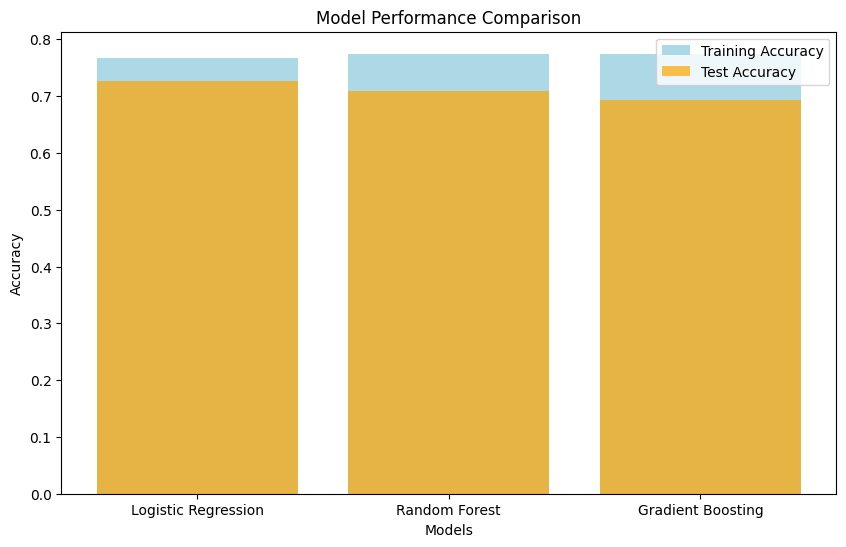

In [85]:
# Visualization of Model Performance
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
train_accuracies = [score, score_train, score_train_gb]
test_accuracies = [score2, score2_rf, score_test_gb]

plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='lightblue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='orange', alpha=0.7, label='Test Accuracy')
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5.ICC Rankings and Fixtures:

ICC rankings and fixtures for the World Cup are loaded from CSV files.
Initial positions of teams in fixtures are inserted based on their ICC rankings.

In [86]:
ranking = pd.read_csv('/content/drive/MyDrive/Project 2/ICC Ranking N.csv', encoding='ISO-8859-1')
fixtures = pd.read_csv('/content/drive/MyDrive/Project 2/Fixtures N.csv', encoding='ISO-8859-1')
pred_set = []

In [87]:
ranking

,Position,Team,Points
0,1,India,116
1,2,Pakistan,115
2,3,Australia,112
3,4,South Africa,106
4,5,England,105
5,6,New Zealand,103
6,7,Sri Lanka,92
7,8,Bangladesh,92
8,9,Afghanistan,80
9,10,Netherlands,37


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

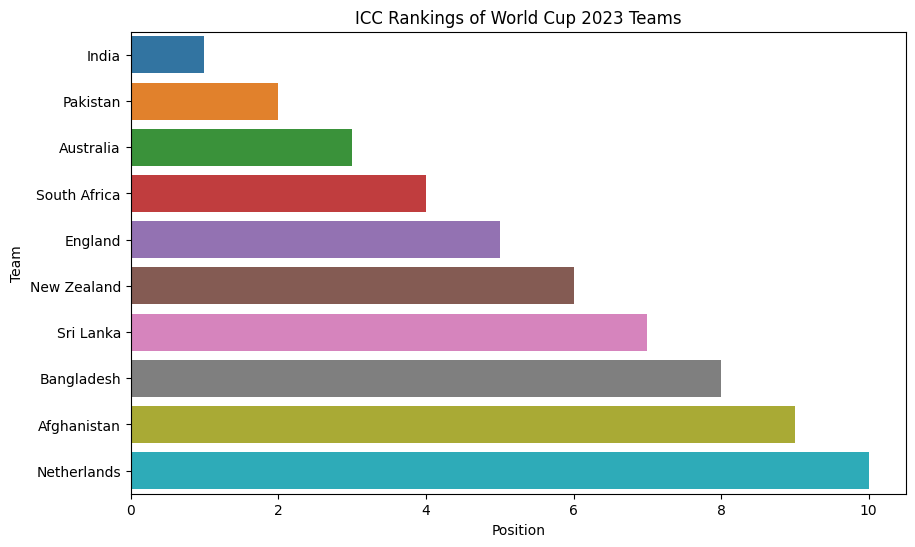

In [89]:
# Visualization of ICC Rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Team', data=ranking.sort_values(by='Position'))
plt.title('ICC Rankings of World Cup 2023 Teams')
plt.xlabel('Position')
plt.ylabel('Team')
plt.show()

In [90]:
fixtures

,Round Number,Date,Team_1,Team_2,Group,Results
0,1,5-Oct-23,England,New Zealand,Group A,NaN
1,1,6-Oct-23,Pakistan,Netherlands,Group A,NaN
2,1,7-Oct-23,Bangladesh,Afghanistan,Group A,NaN
3,1,7-Oct-23,South Africa,Sri Lanka,Group A,NaN
4,1,8-Oct-23,India,Australia,Group A,NaN
5,1,9-Oct-23,New Zealand,Netherlands,Group A,NaN
6,1,10-Oct-23,England,Bangladesh,Group A,NaN
7,1,10-Oct-23,Pakistan,Sri Lanka,Group A,NaN
8,1,11-Oct-23,India,Afghanistan,Group A,NaN
9,1,12-Oct-23,Australia,South Africa,Group A,NaN


In [91]:
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

# Select the first 45 rows of the 'fixtures' DataFrame
fixtures = fixtures.iloc[:45, :]

fixtures

,Round Number,first_position,second_position,Date,Team_1,Team_2,Group,Results
0,1,5.0,6.0,5-Oct-23,England,New Zealand,Group A,NaN
1,1,2.0,10.0,6-Oct-23,Pakistan,Netherlands,Group A,NaN
2,1,8.0,9.0,7-Oct-23,Bangladesh,Afghanistan,Group A,NaN
3,1,4.0,7.0,7-Oct-23,South Africa,Sri Lanka,Group A,NaN
4,1,1.0,3.0,8-Oct-23,India,Australia,Group A,NaN
5,1,6.0,10.0,9-Oct-23,New Zealand,Netherlands,Group A,NaN
6,1,5.0,8.0,10-Oct-23,England,Bangladesh,Group A,NaN
7,1,2.0,7.0,10-Oct-23,Pakistan,Sri Lanka,Group A,NaN
8,1,1.0,9.0,11-Oct-23,India,Afghanistan,Group A,NaN
9,1,3.0,4.0,12-Oct-23,Australia,South Africa,Group A,NaN


In [92]:
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})

pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set

,Team_1,Team_2,winning_team
0,England,New Zealand,None
1,Pakistan,Netherlands,None
2,Bangladesh,Afghanistan,None
3,South Africa,Sri Lanka,None
4,India,Australia,None
5,New Zealand,Netherlands,None
6,England,Bangladesh,None
7,Pakistan,Sri Lanka,None
8,India,Afghanistan,None
9,Australia,South Africa,None


In [93]:
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set

,Team..1_Afghanistan,Team..1_Australia,Team..1_Bangladesh,Team..1_England,Team..1_India,Team..1_Ireland,Team..1_Netherlands,Team..1_New Zealand,Team..1_Oman,Team..1_Pakistan,...,Team..2_Ireland,Team..2_Nepal,Team..2_Netherlands,Team..2_New Zealand,Team..2_Pakistan,Team..2_South Africa,Team..2_Sri Lanka,Team..2_U.A.E.,Team..2_West Indies,Team..2_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])

    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")

New Zealand and England
Winner: England

Netherlands and Pakistan
Winner: Pakistan

Afghanistan and Bangladesh
Winner: Bangladesh

Sri Lanka and South Africa
Winner: South Africa

Australia and India
Winner: India

Netherlands and New Zealand
Winner: New Zealand

Bangladesh and England
Winner: England

Sri Lanka and Pakistan
Winner: Pakistan

Afghanistan and India
Winner: India

South Africa and Australia
Winner: Australia

Bangladesh and New Zealand
Winner: New Zealand

Pakistan and India
Winner: India

Afghanistan and England
Winner: England

Sri Lanka and Australia
Winner: Australia

Netherlands and South Africa
Winner: South Africa

Afghanistan and New Zealand
Winner: New Zealand

Bangladesh and India
Winner: India

Australia and Pakistan
Winner: Pakistan

Netherlands and Sri Lanka
Winner: Sri Lanka

England and South Africa
Winner: South Africa

New Zealand and India
Winner: India

Afghanistan and Pakistan
Winner: Pakistan

Bangladesh and South Africa
Winner: South Africa

Netherl

In [95]:
semi = [('England', 'India'),
            ('New Zealand', 'Australia')]

7.Match Prediction:

A set of matches for the semi-finals and finals are defined.
A function, clean_and_predict, is created to clean the data and make predictions using the trained Random Forest classifier.
The function prints the predicted winners for each match.

In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Import the appropriate classifier

# Assuming you have already defined and trained your RandomForestClassifier (rf)

# Define the function clean_and_predict
def clean_and_predict(matches, ranking, final, rf):
    positions = []
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0], 'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1], 'Position'].iloc[0])

    pred_set = []

    i = 0
    j = 0

    while i < len(positions):
        dict1 = {}

        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        pred_set.append(dict1)
        i += 2
        j += 1

    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    predictions = rf.predict(pred_set)  # Use the RandomForestClassifier (rf) for predictions
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

# Example usage:
# clean_and_predict(semi, ranking, final, rf)


In [97]:
clean_and_predict(semi, ranking, final, rf)

England and India
Winner: India

New Zealand and Australia
Winner: Australia



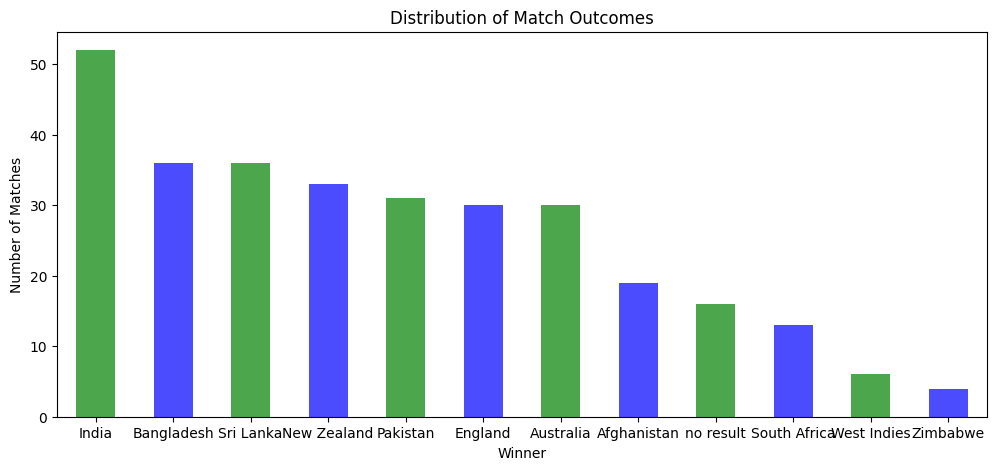

In [98]:
# Visualization of Match Results
plt.figure(figsize=(12, 5))
result_counts = df_teams_2023['Winner'].value_counts()
result_counts.plot(kind='bar', color=['green', 'blue'], alpha=0.7)
plt.title('Distribution of Match Outcomes')
plt.xlabel('Winner')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.show()

In [99]:
finals = [('Australia', 'India')]

In [100]:
clean_and_predict(finals, ranking, final, rf)

Australia and India
Winner: India



8.Example Usage:

The script provides an example of using the clean_and_predict function for predicting semi-finals and finals in the World Cup.

In summary, the script loads and preprocesses World Cup data, trains machine learning models, incorporates ICC rankings, defines fixtures, and predicts match outcomes using a Random Forest classifier. The predictions are based on team rankings, and the script demonstrates how to use the trained model to forecast the winners of specific matches.